In [431]:
# Import Packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [432]:
# Import prospective dataset
df= pd.read_excel('H:/RediMinds/DRMahen/Preethi PN_Data validation_2014-2018.xlsx', sheet_name='PN_Data validation_2014-2018')

In [433]:
df_ori = df.copy()

In [434]:
#check number of patients and columns in Retrospective dataset
print('Number of patients in Combined dataset {}'. format(df.shape[0]))
print('Number of variables in Combined dataset {}'. format(df.shape[1]))

Number of patients in Combined dataset 3395
Number of variables in Combined dataset 161


In [435]:
# reset index for combined dataset
df.reset_index(inplace=True, drop=True)

In [436]:
df.head(5)

,PATIENTNUMBER,PROCNAME,CENTERCODE,SURGEONCODE,RECPROGRESS,CREATEDDATE,GENDER,DATEOFBIRTH,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,ECOG,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,SYMPTOMS,SOLITARYKIDNEY,TYPEOFSOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,PREOPMULTIFOCALITY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,UCSINVASION,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,CM,R.E.N.A.L.NEPHROSCORE,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,EXOPHYTICENDOPHYTICPROPERTIES,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,TumorConsistencyonImaging,BosniakClassification,DATEOFSURGERY,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,ImagingFeaturesofotherexcisedtumor,Consistencyoftheotherexcisedtumors,ACCESS,DAVINCIMODEL,ROBOTICSARMS,ASSISTENTTROCARS,DUALCONSOLE,PRIMARYSURGEON,OPERATIVETIMEmin,ISCHEMIA,CLAMPARTERY,SELECTIVEARTERIALCLAMPING,CLAMPVEIN,EARLYUNCLAMPING,FLUORESCENCE,INNERRENORRHAPHY,OUTERRENORRHAPHY,ISCHEMIATIMEmin,UCSREPAIR,HAEMOSTATICAGENTS,HAEMOSTATICDetails,LYMPHNODEDISSECTIONLND,BLOODLOSSml,INTRAOPTRANSUFUSION,SURGICALCONSIDERATIONS,INTRAOPCOMPLICATION,INTRAOPCOMPLICATIONS,NeedtoConverttoRadicalNephrectomy,TREATMENTOFCOMPLICATION,POSTOPCOMPLICATION,SURGICALCOMPLICATIONS,NONSURGICALCOMPLICATIONS,POSTOPTREATMENTOFCOMPLICATION,CLAVIENGRADE,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,MULITIFOCALITY,PATHOLOGY,HYSTOTYPEMALIGNANAT,HYSTOTYPEMALIGNANATYES,HYSTOTYPEBENIGN,HYSTOTYPEBENIGNYES,FUHRMANGRADING,SARCOMATOIDDIFF,SARCOMATOIDDIFF_A,NECROSIS,MICROVENOUSINVASION,UCSINVASION_A,PERIRENALFATINVASION,HilarFatInvasion,SINUSFATINVASION,MICSCORE,ADRENALINVASION,GEROTAINVASION,RenalVeinInvasion,VENOUSTHROMBUS,SURGICALMARGIN,UNIFOCALMULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITEOFPOSITIVENODE,TREATMENTPSM,PT,PN,OTHERTUMORS,DATEOFRECURRENCE,LASTFOLLOWUPDURATION,TIMETORECURRENCE,LASTFOLLOWUPSTATUS,LASTFOLLOWUPRECURRENCE,LASTTREATMENTOFRECURRENCE,TYPEOFCOMPLICATIONSs,SELECTEDSURGICALCOMPLICATIONSs,SELECTEDNONSURGICALCOMPLICATIONSs,TREATMENTOFCOMPLICATIONSs,RECURRENCEs,FOLLOWUPDATEs,STATUSs,TREATMENTs,CREATININEs,EGFRs,SRFs,ERPFs,Year
0,10PAT000065,Partial Nephrectomy,U5WT3NOY,QIG8PUOL,Pathology completed,2018-11-18 13:00:00.0,Male,1964.0,54.0,Married,White/Caucasian,Not Provided,NaN,NaN,NaN,NaN,"Fully active, able to carry on all pre-disease...",0.0,2.0,Absent,No,NaN,No,Left,Left,No,NaN,Lower Pol,15.4,48.0,6300.0,8.10,NaN,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-21 00:00:00.0,Category 2,Relative,No,1.0,NaN,NaN,Transperitoneal,Xi,4-arms,Only 12 mm,No,Staff,02:30,Warm,Bulldog,No,No,No,Used,Yes,Yes,31.0,Performed,Yes,Surgiflo,Not Performed,50.0,No,NaN,No,NaN,No,NaN,Complications,NaN,"321,323","IV antibiotics, discharged with oral antibiotics",Grade 2: Complications needing only use of int...,13.699999999999999,45,1.14,63,12900,999,999,999,999,NaN,13,35,"0,9",61,4300,5.0,8.0,NaN,NaN,Absent,Benign,No,NaN,Yes,Angiomyolipoma,NaN,Absent,NaN,Absent,Absent,Absent,Absent,Absent,Absent,0.0,Absent,Absent,Absent,Absent,Negative,NaN,NaN,NaN,NaN,Wait and Watch,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
1,13PAT000522,Partial Nephrectomy,08ZMCILJ,G4X4XVDW,Pathology completed,2018-04-22 18:30:00.0,Male,1957.0,61.0,Married,Mongoloid/Asian,Graduate,70.0,167.0,25.10,33.0,"Fully active, able to carry on all pre-disease...",0.0,3.0,Absent,Yes,Left,No,Left,Left,No,Anterior,Lower Pol,12.3,39.4,5400.0,1.25,NaN,58.72,NaN,9.0,2(Intermidiate Risk),Tumours entirely located above the upper or be...,At the medial rim (2 points),Tumou

In [437]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 161 columns):
PATIENTNUMBER                         3395 non-null object
PROCNAME                              3395 non-null object
CENTERCODE                            3395 non-null object
SURGEONCODE                           949 non-null object
RECPROGRESS                           3395 non-null object
CREATEDDATE                           3395 non-null object
GENDER                                3384 non-null object
DATEOFBIRTH                           2028 non-null float64
AGEATSURGERY                          3376 non-null float64
MARITALSTATUS                         2160 non-null object
RACE                                  2099 non-null object
EDUCATION                             1927 non-null object
WEIGHT                                2363 non-null float64
HEIGHT                                2361 non-null float64
BMI                                   3009 non-null float64
CLI

In [438]:
# Prepare target variable for INTRA OP complications
df['INTRA_OP_COMPLICATIONS'] = 0

# selecting indicator == 'Yes' and code vailability or Intra-op Bloos transfusion>1 unit as Intra-op complication
df.loc[((df['INTRAOPCOMPLICATIONS'].notnull()) & (df['INTRAOPCOMPLICATION'] == 'Yes'))|(df['INTRAOPTRANSUFUSION']=='>1 Unit') ,['INTRA_OP_COMPLICATIONS']] = 1
num_complications = df['INTRA_OP_COMPLICATIONS'].sum()

In [439]:
# Total Number patients with complications
print('Total number of patients {}'.format(len(df)))
print('Total number of patients with complications {}'.format(num_complications))
print('Total % of patients with complications {:.3f}'.format(num_complications/len(df)))

Total number of patients 3395
Total number of patients with complications 136
Total % of patients with complications 0.040


### Define numeric columns and replace encoded missing values with NaN

In [440]:
# List of columns tobre converted to numeric
numeric_col_list = ['AGEATSURGERY',
'WEIGHT',
'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
'NOOFLESIONS',
'BLOODLOSSml',
'POSTOPHB_Day1',
'POSTOPHT_Day1',
'POSTOPCreat_Day1',
'POSTOPEGFR_Day1',
'POSTOPWBC_Day1',
'POSTOPHB_Day2',
'POSTOPHT_Day2',
'POSTOPCreat_Day2',
'POSTOPEGFR_Day2',
'POSTOPWBC_Day2',
'POSTOPHB_Day3',
'POSTOPHT_Day3',
'POSTOPCreat_Day3',
'POSTOPEGFR_Day3',
'POSTOPWBC_Day3',
'LENGTHOFSTAYdays',
'PATHOLOGICALTUMORSIZE',
'MINTHICKNESSMARGIN',
'MAXTHICKNESSMARGIN',
'SARCOMATOIDDIFF_A',
'NO_OF_NODE_TAKEN',
'LASTFOLLOWUPDURATION',
'CHARLSONSCORE',
'CHARLSONAGEADJUSTSCORE',
'PADUASCORE',
] 

In [441]:
# Convert columns in numeric_col_list to numeric and invalid values are set NaN 
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [442]:
# Summary of numeric columns
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,INTRA_OP_COMPLICATIONS
count,2028.00,3376.00,2363.00,2361.00,3009.00,3198.00,2816.00,2775.00,2551.00,2425.00,2121.00,3330.00,152.00,2657.00,177.00,2152.00,2014.00,2788.00,3129.00,3271.00,1298.00,1448.00,2358.00,1829.00,944.00,571.00,612.00,795.00,582.00,492.00,440.00,450.00,654.00,411.00,430.00,3186.00,2941.00,1531.00,650.00,2765.00,1407.00,2446.00,2034.00,1909.00,3392.00,3395.00
mean,1956.34,57.70,89.99,163.90,28.68,34.48,1.52,3.52,20.35,46.59,7210.94,4.41,586.08,80.36,730.84,8.40,1.89,1.06,19.84,184.87,49.74,59.47,19.52,97.95,1983.51,166.26,164.61,109.36,214.76,2805.69,232.06,271.79,146.10,293.22,2756.73,3.82,10.87,73.10,193.77,133.74,15.02,0.28,1.09,16.89,2013.33,0.04
std,13.26,12.72,55.94,39.74,5.92,37.87,2.00,2.28,80.19,102.09,3348.54,57.36,466.89,30.38,396.76,1.74,0.82,0.29,36.62,223.21,179.15,166.94,133.60,170.18,4248.06,351.86,340.25,310.10,345.24,4982.11,411.12,422.01,351.87,401.95,4138.05,25.07,23.69,252.83,385.78,337.49,142.76,0.45,31.32,19.59,2.98,0.20
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,0.00,0.00,1.00,0.27,0.00,4.00,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,1.00,-999.00,0.00,0.00,0.00,2006.00,0.00
25%,1947.00,49.00,69.00,160.00,24.59,22.00,0.00,2.00,12.90,36.00,5600.00,0.78,66.50,65.29,210.00,7.00,1.00,1.00,14.00,50.00,11.00,30.40,0.96,52.64,9.18,10.90,27.30,0.91,49.75,9.50,10.70,29.02,0.90,55.78,9.12,2.00,2.40,1.00,2.00,2.00,0.00,0.00,0.00,3.00,2011.00,0.00
50%,1956.00,59.00,79.83,169.00,27.59,30.00,1.00,3.00,13.90,40.80,7000.00,0.91,999.00,79.32,999.00,8.00,2.00,1.00,18.00,100.00,12.10,35.00,1.00,65.00,11.60,12.20,34.20,1.17,67.78,12.00,12.20,35.20,1.12,74.65,999.00,3.00,3.60,2.00,5.00,2.00,0.00,0.00,0.00,10.00,2013.00,0.00
75%,1965.00,67.00,93.25,176.00,31.71,42.00,2.00,5.00,14.90,44.00,8500.00,1.10,999.00,94.00,999.00,10.00,3.00,1.00,23.00,200.00,13.30,38.30,1.30,81.00,18.85,14.50,40.60,1.58,94.99,4990.00,14.22,832.25,1.54,141.00,4300.00,4.00,8.20,5.00,25.00,3.00,0.00,1.00,0.00,24.00,2016.00,0.00
max,1998.00,89.00,999.00,999.00,55.60,999.00,19.00,18.00,999.00,999.00,56000.00,999.00,999.00,999.00,999.00,14.00,3.00,6.00,999.00,3500.00,999.00,999.00,999.00,999.00,19610.00,999.00,999.00,999.00,999.00,27780.00,999.00,999.00,999.00,999.00,16060.00,999.00,999.00,999.00,999.00,999.00,999.00,1.00,999.00,101.00,2018.00,1.00


In [443]:
#replace missing values such as 999 in the dataframe with NaN
df = df.replace([99,999,9999,99999,999999,-99,-999,-9999,-99999,-999999],np.nan)

In [444]:
# replacing negative numbers in the dataframe with nan as given variables cannot contain negative numbers
for col in list(df.select_dtypes('float64')):
    df[col] = df[col].apply(lambda x: np.nan if x<0 else x)

In [445]:
# Summary of numeric columns - to check missing values such as 99, 999, 999 have been replaced
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,INTRA_OP_COMPLICATIONS
count,2028.00,3376.00,2353.00,2358.00,3009.00,3194.00,2816.00,2775.00,2534.00,2398.00,2098.00,3319.00,67.00,2641.00,56.00,2152.00,2014.00,2788.00,3125.00,3268.00,1254.00,1404.00,2315.00,1762.00,897.00,485.00,525.00,709.00,484.00,466.00,342.00,337.00,559.00,308.00,333.00,3184.00,2940.00,1423.00,528.00,2400.00,1375.00,2446.00,2032.00,1909.00,3392.00,3395.00
mean,1956.34,57.70,88.04,162.84,28.68,33.27,1.52,3.52,13.79,35.87,7279.04,1.11,62.23,79.91,151.44,8.40,1.89,1.06,18.59,184.12,16.44,30.03,1.33,66.24,2035.09,18.60,26.34,1.45,63.41,2906.49,12.30,27.95,1.15,65.96,3268.74,3.19,10.54,4.10,11.12,2.15,0.12,0.28,0.11,16.89,2013.33,0.04
std,13.26,12.72,37.17,26.32,5.92,16.40,2.00,2.28,1.75,14.40,3302.70,3.27,23.65,24.63,61.02,1.74,0.82,0.29,10.66,221.94,21.64,13.90,4.59,21.75,4351.91,27.08,15.71,6.51,24.83,5100.64,10.87,22.37,0.56,36.50,4578.29,2.47,15.14,10.41,46.63,0.67,2.28,0.45,0.64,19.59,2.98,0.20
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,0.00,0.00,1.00,0.27,0.00,4.00,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2006.00,0.00
25%,1947.00,49.00,69.00,160.00,24.59,22.00,0.00,2.00,12.80,36.00,5600.00,0.78,42.00,65.01,110.00,7.00,1.00,1.00,14.00,50.00,11.00,30.17,0.95,52.00,9.10,10.70,1.46,0.90,47.22,9.30,10.40,25.70,0.86,49.92,8.50,2.00,2.40,1.00,1.80,2.00,0.00,0.00,0.00,3.00,2011.00,0.00
50%,1956.00,59.00,79.60,169.00,27.59,30.00,1.00,3.00,13.90,40.70,7000.00,0.91,58.00,79.05,132.00,8.00,2.00,1.00,18.00,100.00,12.00,34.95,1.00,64.00,11.30,11.90,32.70,1.10,62.80,11.60,11.70,32.80,1.07,65.00,11.80,3.00,3.60,2.00,3.00,2.00,0.00,0.00,0.00,10.00,2013.00,0.00
75%,1965.00,67.00,93.00,176.00,31.71,42.00,2.00,5.00,14.90,44.00,8500.00,1.10,83.00,93.59,182.50,10.00,3.00,1.00,23.00,200.00,13.18,38.00,1.29,79.00,15.80,13.10,36.90,1.40,79.00,5635.00,12.70,37.00,1.27,79.25,6940.00,4.00,8.20,4.00,8.00,3.00,0.00,1.00,0.00,24.00,2016.00,0.00
max,1998.00,89.00,377.00,208.30,55.60,135.00,19.00,18.00,39.60,88.00,56000.00,96.00,124.00,253.97,340.00,14.00,3.00,6.00,320.00,3500.00,162.00,96.80,143.00,198.30,19610.00,152.00,51.00,174.00,157.70,27780.00,131.00,332.00,5.80,543.00,16060.00,51.00,115.00,240.00,979.00,4.00,70.00,1.00,12.00,101.00,2018.00,1.00


In [446]:
# Correcting the units for erroroneously entered data
def clean_WBC(x):
    if len(str(x))<6:
        x = x*1000
    return x
        

# if the value of PRE-OP WBC value contains is less the 4 digits then multiply it by 1000
df['PREOPWBC'] = df['PREOPWBC'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 1 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day1'] = df['POSTOPWBC_Day1'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day2'] = df['POSTOPWBC_Day2'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day3'] = df['POSTOPWBC_Day3'].apply(lambda x: clean_WBC(x))

In [447]:
# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHB'] = df['PREOPHB'].apply(lambda x: x*100 if x<10 else x)

# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHT'] = df['PREOPHT'].apply(lambda x: x*100 if x<10 else x)

### Define Categorical columns

In [448]:
cat_col = ['PROCNAME',
'CENTERCODE',
'SURGEONCODE',
'RECPROGRESS',
'GENDER',
'MARITALSTATUS',
'RACE',
'EDUCATION',
'ECOG',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',

'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'ImagingFeaturesofotherexcisedtumor',
'Consistencyoftheotherexcisedtumors',
'ACCESS',
'DAVINCIMODEL',
'ROBOTICSARMS',
'ASSISTENTTROCARS',
'DUALCONSOLE',
'PRIMARYSURGEON',
'ISCHEMIA',
'CLAMPARTERY',
'SELECTIVEARTERIALCLAMPING',
'CLAMPVEIN',
'EARLYUNCLAMPING',
'FLUORESCENCE',
'INNERRENORRHAPHY',
'OUTERRENORRHAPHY',
'UCSREPAIR',
'HAEMOSTATICAGENTS',
'HAEMOSTATICDetails',
'LYMPHNODEDISSECTIONLND',
'INTRAOPTRANSUFUSION',
'SURGICALCONSIDERATIONS',
'INTRAOPCOMPLICATION',
'INTRAOPCOMPLICATIONS',
'NeedtoConverttoRadicalNephrectomy',
'TREATMENTOFCOMPLICATION',
'POSTOPCOMPLICATION',
'SURGICALCOMPLICATIONS',
'NONSURGICALCOMPLICATIONS',
'POSTOPTREATMENTOFCOMPLICATION',
'CLAVIENGRADE',
'MULITIFOCALITY',
'PATHOLOGY',
'HYSTOTYPEMALIGNANAT',
'HYSTOTYPEMALIGNANATYES',
'HYSTOTYPEBENIGN',
'HYSTOTYPEBENIGNYES',
'FUHRMANGRADING',
'SARCOMATOIDDIFF',
'NECROSIS',
'MICROVENOUSINVASION',
'UCSINVASION_A',
'PERIRENALFATINVASION',
'HilarFatInvasion',
'SINUSFATINVASION',
'MICSCORE',
'ADRENALINVASION',
'GEROTAINVASION',
'RenalVeinInvasion',
'VENOUSTHROMBUS',
'SURGICALMARGIN',
'UNIFOCALMULTIFOCAL',
'NO_OF_NODE_POSITIVE',
'SITEOFPOSITIVENODE',
'TREATMENTPSM',
'PT',
'PN',
'OTHERTUMORS',
'LASTFOLLOWUPSTATUS',
'LASTFOLLOWUPRECURRENCE',
'LASTTREATMENTOFRECURRENCE'
]

### Select Variables for analysis

In [449]:
# list of variables included for Intra-Op complications 
intra_op_col = [
'PATIENTNUMBER',
#'PROCNAME',
'CENTERCODE',
#'SURGEONCODE',
#'RECPROGRESS',
#'CREATEDDATE',
'GENDER',
#'DATEOFBIRTH',
'AGEATSURGERY',
'MARITALSTATUS',
'RACE',
'EDUCATION',
#'WEIGHT',
#'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'ECOG',
'CHARLSONSCORE',
#'CHARLSONAGEADJUSTSCORE',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
#'PADUASCORE',
'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
#'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
#'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
#'DATEOFSURGERY',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'NOOFLESIONS',
#'ImagingFeaturesofotherexcisedtumor', #too many categories
'Consistencyoftheotherexcisedtumors',
#'ACCESS',
#'DAVINCIMODEL',
#'ROBOTICSARMS',
#'ASSISTENTTROCARS',
#'DUALCONSOLE',
#'PRIMARYSURGEON',
#'OPERATIVETIMEmin',
#'ISCHEMIA',
#'CLAMPARTERY',
#'SELECTIVEARTERIALCLAMPING',
#'CLAMPVEIN',
#'EARLYUNCLAMPING',
#'FLUORESCENCE',
#'INNERRENORRHAPHY',
#'OUTERRENORRHAPHY',
#'ISCHEMIATIMEmin',
#'UCSREPAIR',
#'HAEMOSTATICAGENTS',
#'HAEMOSTATICDetails',
#'LYMPHNODEDISSECTIONLND',
#'BLOODLOSSml',
#'INTRAOPTRANSUFUSION',
#'SURGICALCONSIDERATIONS',
#'INTRAOPCOMPLICATION',
#'INTRAOPCOMPLICATIONS',
'INTRA_OP_COMPLICATIONS'    
]

In [450]:
len(intra_op_col)

50

### Data Cleaning

In [451]:
# Selecting dataframe relevant columsn for analysis
df = df[intra_op_col].copy()

In [452]:
target = 'INTRA_OP_COMPLICATIONS'

In [453]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,LOCATIONTOPOLARLINE,NOOFLESIONS,INTRA_OP_COMPLICATIONS
count,3376.000000,3009.000000,3194.000000,2816.000000,2534.000000,2398.000000,2098.000000,3319.000000,67.000000,2641.000000,56.000000,2014.000000,2788.000000,3395.000000
mean,57.704976,28.681941,33.272041,1.515625,30.025083,41.279775,7584.309314,1.108866,62.230448,79.910629,151.437500,1.892751,1.055954,0.040059
std,12.723756,5.916510,16.395130,1.995493,118.669940,6.107906,4960.175584,3.265859,23.648291,24.631750,61.022728,0.817358,0.293006,0.196126
min,16.000000,15.100000,0.000000,0.000000,10.000000,10.400000,0.000000,0.000000,18.000000,0.020000,43.500000,1.000000,0.000000,0.000000
25%,49.000000,24.590000,22.000000,0.000000,12.900000,38.300000,5770.000000,0.780000,42.000000,65.010000,110.000000,1.000000,1.000000,0.000000
50%,59.000000,27.590000,30.000000,1.000000,14.000000,41.600000,7100.000000,0.910000,58.000000,79.050000,132.000000,2.000000,1.000000,0.000000
75%,67.000000,31.710000,42.000000,2.000000,15.000000,44.475000,8600.000000,1.100000,83.000000,93.590000,182.500000,3.000000,1.000000,0.000000
max,89.000000,55.600000,135.000000,19.000000,990.000000,180.000000,186000.000000,96.000000,124.000000,253.971416,340.000000,3.000000,6.000000,1.000000


In [454]:
numeric_stats = df.describe()

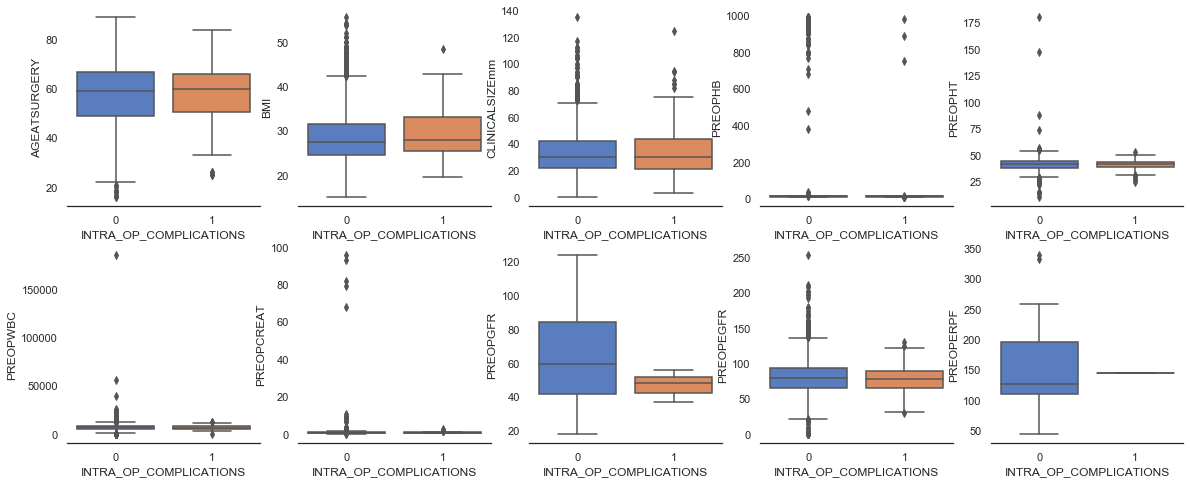

In [455]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 5, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[0, 4])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPGFR', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])
sns.boxplot(data = df, y = 'PREOPERPF', x = target, ax=axes[1, 4])

In [456]:
# Check the number of outliers
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPGFR','PREOPEGFR','PREOPERPF']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    print(i, len(df.loc[(df[i]<=LL)|(df[i]>=UL)]))

BMI 97
CLINICALSIZEmm 79
PREOPHB 55
PREOPHT 41
PREOPWBC 124
PREOPCREAT 163
PREOPGFR 0
PREOPEGFR 77
PREOPERPF 2


In [457]:
#replacing inaccurate readings with missing values
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPGFR','PREOPEGFR','PREOPERPF']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    df.drop(df.loc[(df[i]<=LL)|(df[i]>=UL),[i]].index, inplace=True)

In [458]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,LOCATIONTOPOLARLINE,NOOFLESIONS,INTRA_OP_COMPLICATIONS
count,2834.000000,2511.000000,2718.000000,2363.000000,2141.000000,2011.000000,1713.000000,2797.000000,49.000000,2174.000000,23.000000,1653.000000,2332.000000,2851.000000
mean,57.568454,28.101034,31.759124,1.471435,13.913526,41.556738,7205.871535,0.927822,65.908776,81.066642,182.847826,1.894737,1.046312,0.039635
std,12.567070,5.048146,13.850523,1.966358,1.443346,4.247776,1950.919183,0.209679,22.920155,18.815583,54.225002,0.818847,0.245944,0.195135
min,16.000000,15.100000,0.000000,0.000000,10.000000,29.800000,1840.000000,0.360000,35.000000,34.000000,43.500000,1.000000,0.000000,0.000000
25%,49.000000,24.450000,22.000000,0.000000,12.900000,38.800000,5700.000000,0.780000,44.000000,67.405000,144.500000,1.000000,1.000000,0.000000
50%,59.000000,27.280000,30.000000,1.000000,14.000000,41.900000,7000.000000,0.900000,60.000000,80.000000,196.000000,2.000000,1.000000,0.000000
75%,67.000000,31.221300,40.000000,2.000000,15.000000,44.700000,8360.000000,1.060000,86.000000,93.142500,227.500000,3.000000,1.000000,0.000000
max,89.000000,42.300000,71.000000,19.000000,17.800000,53.700000,12840.000000,1.570000,124.000000,136.080000,258.000000,3.000000,4.000000,1.000000


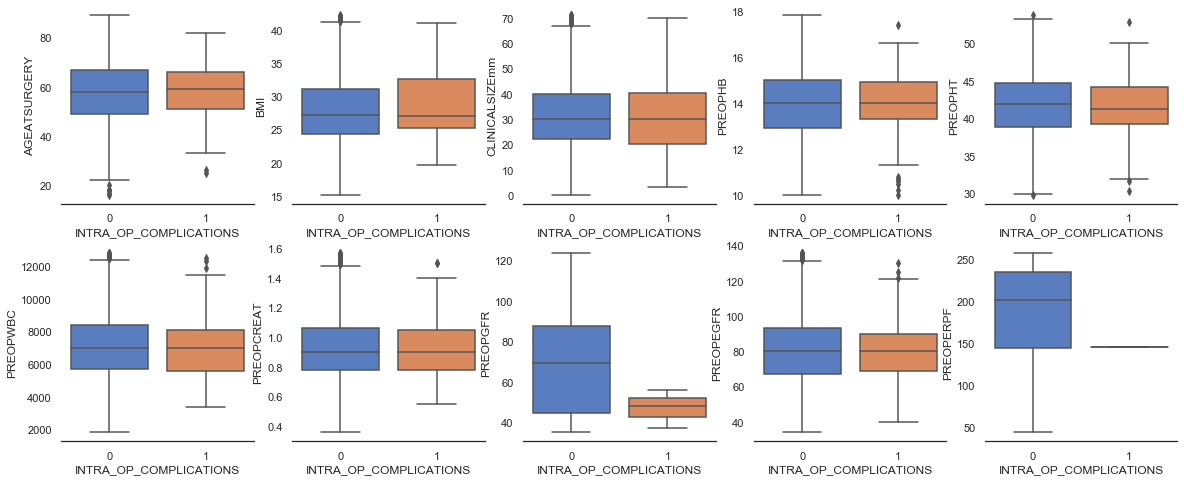

In [459]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 5, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[0, 4])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPGFR', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])
sns.boxplot(data = df, y = 'PREOPERPF', x = target, ax=axes[1, 4])

In [460]:
# The percentage of missing data
df.isnull().mean()

PATIENTNUMBER                         0.000000
CENTERCODE                            0.000000
GENDER                                0.003858
AGEATSURGERY                          0.005963
MARITALSTATUS                         0.367590
RACE                                  0.396352
EDUCATION                             0.441599
BMI                                   0.119256
CLINICALSIZEmm                        0.046650
ECOG                                  0.463346
CHARLSONSCORE                         0.171168
SYMPTOMS                              0.233251
SOLITARYKIDNEY                        0.141705
TYPEOFSOLITARYKIDNEY                  0.966328
BILATERALITYOFTUMOR                   0.393195
SIDEOFTUMOR                           0.332164
SIDEOFSURGERY                         0.003508
PREOPMULTIFOCALITY                    0.731673
FACE                                  0.247632
TUMORlOCATION                         0.140302
PREOPHB                               0.249035
PREOPHT      

In [461]:
#Keep columns having less than 50% missing data
df = df[df.columns[df.isnull().mean() <= 0.50]].copy()

print("Total number of columns left after removing columns with missing data: {}".format(len(list(df))))

Total number of columns left after removing columns with missing data: 43


In [462]:
# Calculate number missing values per row
df.reset_index(inplace=True, drop=True)
missing = {}

for i in range(len(df)):
    miss_cnt = 0
    for col in df.columns:
        if pd.isna(df[col][i]) == True:
            miss_cnt = miss_cnt+1
    df.loc[i,'Missing'] = miss_cnt

In [463]:
# calculate number of records with over 25% missing data
print("Total Records {}".format(len(df)))
print("Records with >=25% missing data {}".format(sum(df['Missing']<= round((len(df.columns)-2)*.25))))
print("Records to be dropped {}".format(len(df) - sum(df['Missing']<= round((len(df.columns)-2)*.25))))

Total Records 2851
Records with >=25% missing data 1458
Records to be dropped 1393


In [464]:
#removing patients with more than 75% missing data
df = df[df['Missing']<= round((len(df.columns)-2)*.25) ].copy()

In [465]:
#Keep columns having less than 10% missing data
df = df[df.columns[df.isnull().mean() <= 0.10]].copy()

print("Total number of columns left after removing columns with missing data: {}".format(len(list(df))))

Total number of columns left after removing columns with missing data: 40


In [466]:
# The percentage of missing data
df.isnull().mean()

PATIENTNUMBER                         0.000000
CENTERCODE                            0.000000
GENDER                                0.000000
AGEATSURGERY                          0.001372
MARITALSTATUS                         0.053498
RACE                                  0.055556
EDUCATION                             0.067215
BMI                                   0.054184
CLINICALSIZEmm                        0.032922
CHARLSONSCORE                         0.017147
SYMPTOMS                              0.001372
SOLITARYKIDNEY                        0.001372
BILATERALITYOFTUMOR                   0.056927
SIDEOFTUMOR                           0.056927
SIDEOFSURGERY                         0.000686
FACE                                  0.050069
TUMORlOCATION                         0.015775
PREOPHB                               0.019204
PREOPHT                               0.019890
PREOPWBC                              0.072016
PREOPCREAT                            0.007545
PADUARISK    

In [467]:
# Replcaing missing values in categorical column with NA
for k in cat_col:
    if k in df.columns:
        df[k].fillna('NA',inplace = True)

In [468]:
# Replacing missing values in numerical columns with their respective mean 
for k in numeric_col_list:
    if k in df.columns:
        df[k].fillna(round(df[k].mean()), inplace = True)

In [469]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 2841
Data columns (total 40 columns):
PATIENTNUMBER                         1458 non-null object
CENTERCODE                            1458 non-null object
GENDER                                1458 non-null object
AGEATSURGERY                          1458 non-null float64
MARITALSTATUS                         1458 non-null object
RACE                                  1458 non-null object
EDUCATION                             1458 non-null object
BMI                                   1458 non-null float64
CLINICALSIZEmm                        1458 non-null float64
CHARLSONSCORE                         1458 non-null float64
SYMPTOMS                              1458 non-null object
SOLITARYKIDNEY                        1458 non-null object
BILATERALITYOFTUMOR                   1458 non-null object
SIDEOFTUMOR                           1458 non-null object
SIDEOFSURGERY                         1458 non-null object
FACE

In [470]:
# check unique value in each column of type object
unique_count_list = {}

for k in cat_col:
    if k in df.columns:
        unique_count_list.update({k:len(df[k].unique())})

unique_count_list

{'CENTERCODE': 17,
 'GENDER': 2,
 'MARITALSTATUS': 5,
 'RACE': 5,
 'EDUCATION': 5,
 'SYMPTOMS': 4,
 'SOLITARYKIDNEY': 4,
 'BILATERALITYOFTUMOR': 3,
 'SIDEOFTUMOR': 4,
 'SIDEOFSURGERY': 4,
 'FACE': 3,
 'TUMORlOCATION': 6,
 'PADUARISK': 5,
 'POLARLOCATION': 3,
 'RIMLOCATION': 3,
 'RENALSINUS': 3,
 'EXOPHYTICRATE': 4,
 'CLINICALSIZEGROUP': 4,
 'CT': 6,
 'CN': 4,
 'R.E.N.A.L.NEPHRORISKSTRATIFICATION': 5,
 'RADIUSmaximaldiameterincm': 4,
 'NEARNESSOFTUMOUR': 4,
 'ANTERIORORPOSTERIOR': 4,
 'LOCATIONTOPOLARLINE': 4,
 'ASASCORE': 5,
 'PARTIALNEPHROINDICATION': 4,
 'MULTIFOCALITY': 3}

In [471]:
# convert object columns with less than 10 unique values into type category
for col in unique_count_list:
        df[col] = df[col].astype('category').copy()

In [472]:
# list of features with high number of categories
for col in unique_count_list:
    if unique_count_list[col]>10:
        print(col,unique_count_list[col])

CENTERCODE 17


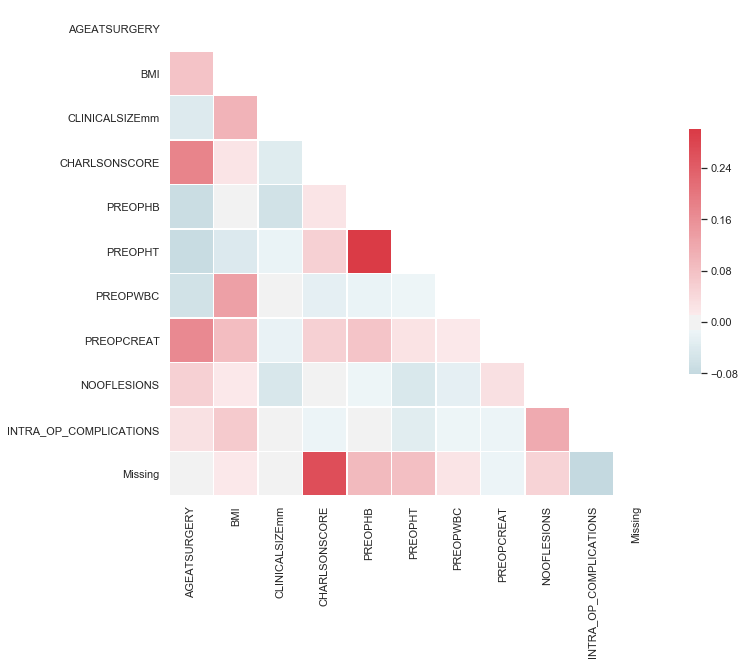

In [473]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [474]:
df.reset_index(drop=True, inplace=True)
print("Number records for predicting intra-op complications: {}".format(len(df)))

Number records for predicting intra-op complications: 1458


In [475]:
for i in df.select_dtypes('category').columns:
    df[i] = df[i].apply(str)

In [476]:
# fit label encoder to each column of type category
cat_col =df.select_dtypes('category')
df_codes = df.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in cat_col }
for col in cat_col:
    le_dict[col].fit_transform(df_codes[col])

In [477]:
# create a dictionary cantaining mapping of categorical values to numerical values
label_mapping = dict()
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in cat_col}
label_mapping

{'CENTERCODE': {'08ZMCILJ': 0,
  '0VZRZWAI': 1,
  '39HIP3LQ': 2,
  '3QWOG020': 3,
  '4M49I4D5': 4,
  '4UPDM0XB': 5,
  '63DCGHNW': 6,
  '94ISQMHX': 7,
  'FWL0MH42': 8,
  'GCIEYK6L': 9,
  'GQHLD5Q4': 10,
  'QRJWT5QR': 11,
  'RETM03Y8': 12,
  'U5WT3NOY': 13,
  'VNO3BPES': 14,
  'VRVRQ639': 15,
  'WGC7XYXZ': 16},
 'GENDER': {'Female': 0, 'Male': 1},
 'MARITALSTATUS': {'Divorced': 0,
  'Married': 1,
  'NA': 2,
  'Single': 3,
  'Widowed': 4},
 'RACE': {'Black': 0,
  'Mongoloid/Asian': 1,
  'NA': 2,
  'Others': 3,
  'White/Caucasian': 4},
 'EDUCATION': {'Graduate': 0,
  'NA': 1,
  'Not Provided': 2,
  'Post Graduate': 3,
  'Upto High School': 4},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARYKIDNEY': {'NA': 0, 'No': 1, 'Yes': 2, 'no': 3},
 'BILATERALITYOFTUMOR': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDEOFTUMOR': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'SIDEOFSURGERY': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'FACE': {'Anterio

In [478]:
# mapping categorical column values to integer labels
for col in cat_col:
    df_codes[col] = le_dict[col].transform(df_codes[col]).copy()

In [479]:
df_codes.head()

,PATIENTNUMBER,CENTERCODE,GENDER,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,BMI,CLINICALSIZEmm,CHARLSONSCORE,SYMPTOMS,SOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,INTRA_OP_COMPLICATIONS,Missing
0,13PAT000522,0,1,61.0,1,1,0,25.10,33.0,0.0,0,2,1,1,1,0,0,12.3,39.4,5400.0,1.25,2,2,0,1,0,1,1,1,2,1,0,2,1,2,1,1,1.0,0,0.0
1,22PAT000131,16,1,58.0,1,1,2,23.18,44.0,0.0,0,1,1,1,1,0,2,14.0,41.0,5100.0,0.90,3,1,0,2,1,0,2,1,3,0,0,0,2,0,1,1,1.0,0,1.0
2,11PAT000166,1,1,56.0,1,1,2,23.36,32.0,0.0,0,1,1,1,1,0,0,10.2,36.4,5200.0,0.70,1,2,2,1,1,1,1,1,1,1,1,0,0,0,1,1,1.0,0,2.0
3,15PAT000097,14,0,65.0,1,4,2,26.67,32.0,0.0,0,1,1,1,1,1,4,11.8,36.0,5300.0,1.12,1,2,2,1,0,1,1,1,1,1,2,2,0,1,1,1,1.0,0,3.0
4,15PAT000095,14,0,23.0,3,4,2,19.65,23.0,0.0,0,1,1,3,3,2,3,13.3,39.2,12100.0,0.70,3,1,0,2,2,1,1,1,3,1,0,3,2,0,1,1,1.0,0,2.0


### Create Stats fot dataset

In [480]:
# print median , IQR for numeric columns 
for i in df.columns:#['AGEATSURGERY','BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR','NOOFLESIONS']:
    if i in numeric_col_list:
        print(i, "{0:.1f} [{1:.1f}-{2:.1f}]".format(np.median(df[i]),np.percentile(df[i],25),np.percentile(df[i],75)))

AGEATSURGERY 57.5 [48.0-66.0]
BMI 27.0 [24.2-29.8]
CLINICALSIZEmm 31.0 [22.0-41.0]
CHARLSONSCORE 1.0 [0.0-2.0]
PREOPHB 14.0 [13.0-15.0]
PREOPHT 42.0 [39.1-44.8]
PREOPWBC 7112.0 [5800.0-8100.0]
PREOPCREAT 0.9 [0.8-1.1]
NOOFLESIONS 1.0 [1.0-1.0]


In [481]:
for i in df_codes.columns:
    if i in cat_col:
        print(df_codes[i].apply(lambda x: le_dict[i].inverse_transform([x])[0]).value_counts(), "\n")

GCIEYK6L    412
63DCGHNW    211
4M49I4D5    158
08ZMCILJ    109
VNO3BPES     82
4UPDM0XB     80
FWL0MH42     70
0VZRZWAI     64
QRJWT5QR     57
WGC7XYXZ     43
U5WT3NOY     36
GQHLD5Q4     36
RETM03Y8     30
3QWOG020     25
VRVRQ639     24
39HIP3LQ     15
94ISQMHX      6
Name: CENTERCODE, dtype: int64 

Male      961
Female    497
Name: GENDER, dtype: int64 

Married     1159
Single       133
NA            78
Divorced      45
Widowed       43
Name: MARITALSTATUS, dtype: int64 

White/Caucasian    736
Others             347
Mongoloid/Asian    258
NA                  81
Black               36
Name: RACE, dtype: int64 

Not Provided        651
Graduate            393
Upto High School    165
Post Graduate       151
NA                   98
Name: EDUCATION, dtype: int64 

Absent               1184
Local Symptoms        245
Systemic Symptoms      27
NA                      2
Name: SYMPTOMS, dtype: int64 

No     929
no     490
Yes     37
NA       2
Name: SOLITARYKIDNEY, dtype: int64 

No     

In [482]:
traget_stats = pd.merge(df_codes[['PATIENTNUMBER']],
                        df_ori[['PATIENTNUMBER','INTRAOPCOMPLICATIONS','SURGICALCOMPLICATIONS','NONSURGICALCOMPLICATIONS']], 
                        left_on='PATIENTNUMBER', 
                        right_on='PATIENTNUMBER').copy()

In [483]:
traget_stats['INTRAOPCOMPLICATIONS'].value_counts()

179        61
180        12
335         9
181         4
182         3
310         2
179,179     2
180,310     2
Name: INTRAOPCOMPLICATIONS, dtype: int64

In [484]:
traget_stats['SURGICALCOMPLICATIONS'].value_counts()

320            31
316             6
316,316         5
320,320         5
318             4
314             3
317             1
319,320         1
320,320,320     1
314315320       1
316,320         1
316,316,316     1
319             1
Name: SURGICALCOMPLICATIONS, dtype: int64

In [485]:
traget_stats['NONSURGICALCOMPLICATIONS'].value_counts()

321       42
324326     1
323        1
Name: NONSURGICALCOMPLICATIONS, dtype: int64

In [486]:
df_codes.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)

### Create Train and Test dataset 

In [487]:
df_codes.corr()['INTRA_OP_COMPLICATIONS']

CENTERCODE                            0.077881
GENDER                               -0.054118
AGEATSURGERY                          0.027539
MARITALSTATUS                        -0.004120
RACE                                  0.124517
EDUCATION                             0.064070
BMI                                   0.064494
CLINICALSIZEmm                        0.000093
CHARLSONSCORE                        -0.014879
SYMPTOMS                              0.011687
SOLITARYKIDNEY                       -0.067064
BILATERALITYOFTUMOR                   0.222824
SIDEOFTUMOR                          -0.097033
SIDEOFSURGERY                         0.031061
FACE                                  0.006850
TUMORlOCATION                         0.000887
PREOPHB                              -0.011162
PREOPHT                              -0.033262
PREOPWBC                             -0.011993
PREOPCREAT                           -0.015058
PADUARISK                             0.007025
POLARLOCATION

In [488]:
print('Number of patients {}'.format(len(df_codes)))
print('% of patients with complications {:.2f}%'.format(sum(df_codes['INTRA_OP_COMPLICATIONS'])/len(df_codes)*100))

Number of patients 1458
% of patients with complications 6.58%


In [489]:
output_path = 'H:\RediMinds\VCQI'
df_codes.to_csv(output_path+"\VCQI_clean.csv",index=False)

In [490]:
# Split data in test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_codes, test_size=0.30, random_state=42, stratify = df_codes['INTRA_OP_COMPLICATIONS'])

In [491]:
# Percentage of complications in trainset
train['INTRA_OP_COMPLICATIONS'].sum()/len(train)

0.06568627450980392

In [492]:
# Percentage of complications in testset
test['INTRA_OP_COMPLICATIONS'].sum()/len(test)

0.06621004566210045

In [493]:
# Save train and test dataset
train.to_csv(output_path+"\VCQI_clean_train.csv",index=False)
test.to_csv(output_path+"\VCQI_clean_test.csv",index=False)

In [494]:
import pickle

cat_col = df.select_dtypes('category')

with open(output_path+'\cat_col', 'wb') as fp:
    pickle.dump(cat_col.columns.to_list(), fp)